In [10]:
import json
import pandas as pd

# Load JSON file
with open('data/older_news_articles.json', 'r') as f:
    data = json.load(f)

# Flatten JSON: turn each key (URL) into a row, and merge URL into the values
flattened_data = []

for url, article_data in data.items():
    article_data['url_key'] = url  # add the key as a new column
    flattened_data.append(article_data)

# Now convert to DataFrame
df = pd.DataFrame(flattened_data)

# Preview
print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   source      592 non-null    object
 1   url         592 non-null    object
 2   date        592 non-null    object
 3   time        592 non-null    object
 4   title       592 non-null    object
 5   body        592 non-null    object
 6   summary     592 non-null    object
 7   keywords    592 non-null    object
 8   image_url   592 non-null    object
 9   clean_body  592 non-null    object
 10  url_key     592 non-null    object
dtypes: object(11)
memory usage: 51.0+ KB
None
  source                                                url        date  \
0    CNN  https://www.cnn.com/business/live-news/jobs-re...  2024-07-05   
1    CNN  https://www.cnn.com/travel/article/best-nude-b...  2024-07-04   
2   CNBC  https://www.cnbc.com/2024/07/06/biden-abc-inte...  2024-07-06   
3   CNBC  https://www.cnbc.c

In [11]:
print("Number of articles:", len(df))


Number of articles: 592


In [7]:
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Show rows where 'body' is missing
print("\nArticles missing body:")
print(df[df['body'].isnull()])



Missing values per column:
source                0
url                   0
date                  0
time                  0
title                 0
body                  0
summary               0
keywords              0
image_url             0
clean_body            0
sentiment             0
sentiment_category    0
url_key               0
dtype: int64

Articles missing body:
Empty DataFrame
Columns: [source, url, date, time, title, body, summary, keywords, image_url, clean_body, sentiment, sentiment_category, url_key]
Index: []


In [3]:
# Check duplicate titles
duplicate_titles = df[df['title'].duplicated(keep=False)]
print(f"\nNumber of duplicate titles: {duplicate_titles.shape[0]}")
print(duplicate_titles[['title', 'url_key']])



Number of duplicate titles: 10
                                                 title url_key
155  S&P 500 investors vs. actively managed funds: ...     155
346  S&P 500 investors vs. actively managed funds: ...     346
460  Why analysts say healthcare's recent underperf...     460
461  Why this is the most misunderstood bull market...     461
462  Here are some of the major themes to watch out...     462
463    Two risks to the AI tech rally By Investing.com     463
493  Here are some of the major themes to watch out...     493
589  Why analysts say healthcare's recent underperf...     589
590  Why this is the most misunderstood bull market...     590
591    Two risks to the AI tech rally By Investing.com     591


In [4]:
# Check duplicate URLs
duplicate_urls = df[df['url_key'].duplicated(keep=False)]
print(f"\nNumber of duplicate URLs: {duplicate_urls.shape[0]}")
print(duplicate_urls[['url_key']])



Number of duplicate URLs: 0
Empty DataFrame
Columns: [url_key]
Index: []


In [8]:
# Check duplicates by both title & clean_body
duplicate_combined = df[df.duplicated(subset=['title', 'clean_body'], keep=False)]
print(f"\nNumber of exact duplicates (title + clean_body): {duplicate_combined.shape[0]}")
print(duplicate_combined[['title', 'url_key']])



Number of exact duplicates (title + clean_body): 8
                                                 title url_key
460  Why analysts say healthcare's recent underperf...     460
461  Why this is the most misunderstood bull market...     461
462  Here are some of the major themes to watch out...     462
463    Two risks to the AI tech rally By Investing.com     463
493  Here are some of the major themes to watch out...     493
589  Why analysts say healthcare's recent underperf...     589
590  Why this is the most misunderstood bull market...     590
591    Two risks to the AI tech rally By Investing.com     591


In [9]:
# Drop duplicates based on title + clean_body
df = df.drop_duplicates(subset=['title', 'clean_body'], keep='first').reset_index(drop=True)

# Confirm result
print(f"✅ Duplicates removed. Remaining articles: {df.shape[0]}")


✅ Duplicates removed. Remaining articles: 588


In [12]:
import pandas as pd

# Load the older articles
df = pd.read_json("data/older_news_articles.json").T.reset_index(drop=True)

# Drop duplicates based on 'title' + 'clean_body'
df = df.drop_duplicates(subset=['title', 'clean_body'], keep='first').reset_index(drop=True)

# Save cleaned dataset
df.to_json("data/cleaned_older_articles.json", orient="index", indent=4)

print(f"✅ Cleaned data saved as 'data/cleaned_older_articles.json' with {df.shape[0]} articles.")


✅ Cleaned data saved as 'data/cleaned_older_articles.json' with 588 articles.


  month_year  article_count
0    2024-06              5
1    2024-07            587


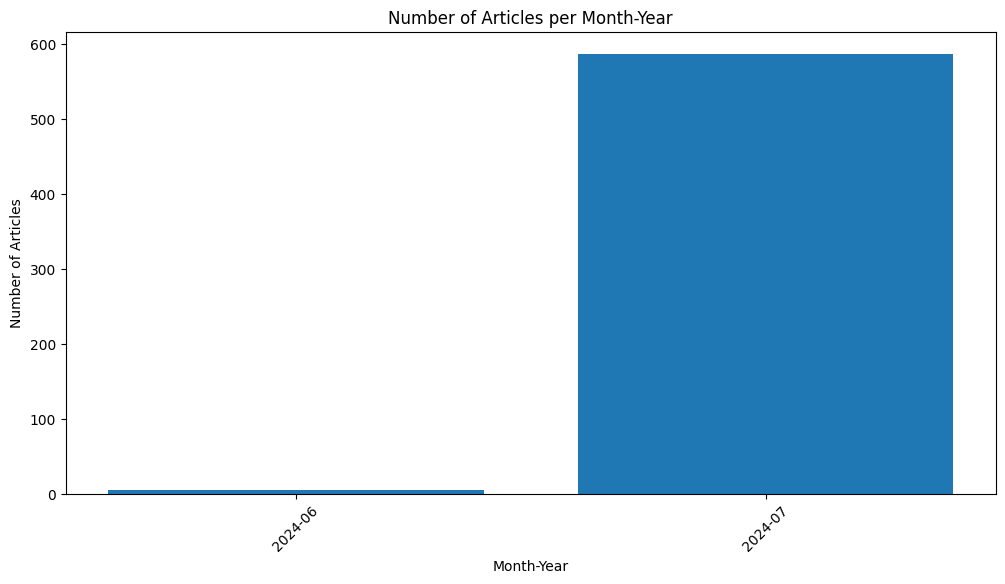

In [6]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid/missing dates
df = df.dropna(subset=['date'])

# Create Month-Year column
df['month_year'] = df['date'].dt.to_period('M').astype(str)

# Group and count
article_counts = df.groupby('month_year').size().reset_index(name='article_count')

# Print result
print(article_counts)

# Save to Excel
article_counts.to_excel('article_counts_by_month.xlsx', index=False)

# Optional plot
import matplotlib.pyplot as plt
article_counts_sorted = article_counts.sort_values('month_year')

plt.figure(figsize=(12,6))
plt.bar(article_counts_sorted['month_year'], article_counts_sorted['article_count'])
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Month-Year')
plt.show()


  year_week  article_count
0  2024-W26              5
1  2024-W27            587


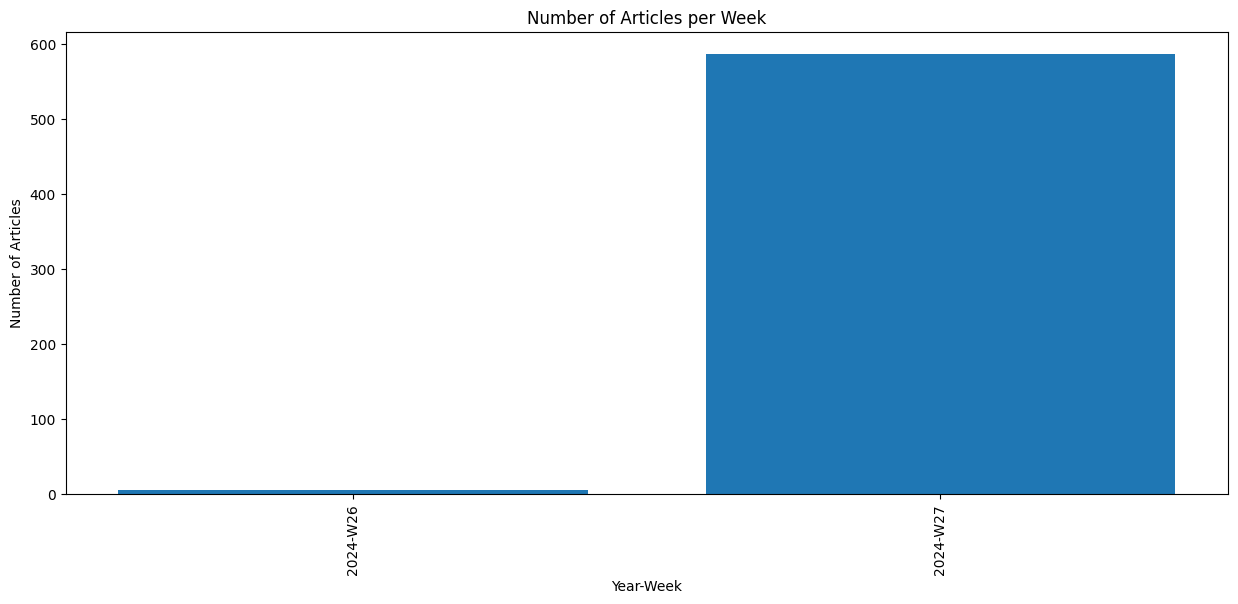

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df already loaded
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# Create Year-Week column
df['year_week'] = df['date'].dt.isocalendar().year.astype(str) + '-W' + df['date'].dt.isocalendar().week.astype(str).str.zfill(2)

# Group and count
article_counts_week = df.groupby('year_week').size().reset_index(name='article_count')

# Print
print(article_counts_week)

# Save to Excel
article_counts_week.to_excel('article_counts_by_week.xlsx', index=False)

# Plot
article_counts_week_sorted = article_counts_week.sort_values('year_week')

plt.figure(figsize=(15,6))
plt.bar(article_counts_week_sorted['year_week'], article_counts_week_sorted['article_count'])
plt.xticks(rotation=90)
plt.xlabel('Year-Week')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Week')
plt.show()



In [13]:
import pandas as pd

# Assuming df['date'] is already datetime
df['date_only'] = df['date'].dt.date

# Count articles per date
article_counts_date = df.groupby('date_only').size().reset_index(name='article_count')

# Sort
article_counts_date = article_counts_date.sort_values('date_only')

# Print
print(article_counts_date)


# Optional: print articles per date
for date, group in df.groupby('date_only'):
    print(f"\nDate: {date}")
    for _, row in group.iterrows():
        print(f"- {row['title']} ({row['url_key']})")


    date_only  article_count
0  2024-06-30              5
1  2024-07-01             22
2  2024-07-02             35
3  2024-07-03             57
4  2024-07-04             58
5  2024-07-05            124
6  2024-07-06            125
7  2024-07-07            166

Date: 2024-06-30
- 'Inside Out 2' tops $1 billion at the global box office, first film to do so since 'Barbie' (https://www.cnbc.com/2024/06/30/inside-out-2-tops-1-billion-at-global-box-office-first-since-barbie.html)
- More companies are staying quiet during Pride, but money is still flowing to LGBTQ+ causes (https://www.cnbc.com/2024/06/30/pride-month-more-companies-stay-quiet-but-donations-keep-flowing.html)
- Fathom, the company behind classic films at your local theater, is making major gains in moviegoing (https://www.cnbc.com/2024/06/30/fathom-joint-venture-of-amc-regal-cinemark-makes-major-gains.html)
- Top Wall Street analysts favor these dividend stocks for better returns (https://www.cnbc.com/2024/06/30/top-wall-stree